In [1]:
import numpy as np

# 1

In [2]:
X = np.random.rand(100000,3)
Y = X.dot(np.array([1,2,3])) + np.random.randn(100000)

In [4]:
class OLS:
    
    def __init__(self, y, x):
        self.y = y
        self.x = x
        nrows = self.x.shape[0]
        l = np.full((nrows,1), 1) # add intercept (sorry, can't do without it, Sergei allowed)
        self.x = np.concatenate((l,x),axis=1) # merge with the 1s column
        # self.x = np.vstack((l, self.x))
        self.bh = np.dot(np.linalg.inv(np.dot(self.x.T,self.x)), np.dot(self.x.T,self.y)) # betas' calculation
        self.pred = self.bh[0]
        for i in range(len(self.bh) - 1):
            self.pred = self.pred + self.x[:, i+1] * self.bh[i+1]
        
        self.n = self.x.shape[0]
        self.k = self.x.shape[1]
        
        self.VCV = np.true_divide(1,self.n-self.k) * np.dot(np.dot(self.pred.T,self.pred),\
                                                            np.linalg.inv(np.dot(self.x.T,self.x)))
        self.stderror = np.sqrt(np.diagonal(self.VCV))
        
        self.check = self.y - self.pred
        
    def beta(self):           
        return self.bh
            
    def predict(self):
        return self.pred
    
    def V(self):
        return self.VCV
    
    def std(self):
        return self.stderror
    
    def check_distr_res(self):
        return self.check
    

In [5]:
model = OLS(Y,X)

In [6]:
model.predict()

array([ 2.99045934,  4.52315569,  3.97512765, ...,  0.64473915,
        4.57571085,  4.85057031])

In [7]:
model.V()

array([[  1.01973613e-03,  -6.13675553e-04,  -6.12250496e-04,
         -6.08961296e-04],
       [ -6.13675553e-04,   1.22754383e-03,   1.14200284e-06,
          2.08860051e-07],
       [ -6.12250496e-04,   1.14200284e-06,   1.22191884e-03,
         -3.79491424e-06],
       [ -6.08961296e-04,   2.08860051e-07,  -3.79491424e-06,
          1.22309893e-03]])

In [8]:
model.std()

array([ 0.03193331,  0.03503632,  0.03495596,  0.03497283])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022A93276470>]], dtype=object)

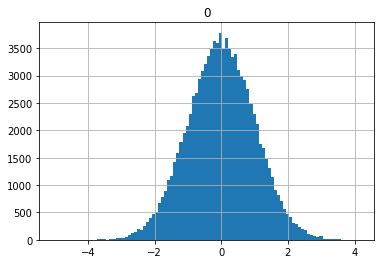

In [9]:
# check errors are distributed normally
import pandas as pd
% matplotlib inline
pd.DataFrame(model.check_distr_res()).hist(bins = 100)

# 2

In [10]:
# 1-3
bh = np.random.uniform(0,1,11)
xh = np.random.uniform(-5,5,200)
uh = 10 * np.random.rand(200)

In [11]:
def factorial(n):
    
    if (n == 1):
        return 1
    elif (n == 0):
        return 1
    else:
        return n * factorial(n-1)

In [12]:
# 4
yh = list()

for i in range(200):
    temp = 0
    for k in range(11):   
        temp = temp + (bh[k] * (xh[i] ** k) / factorial(k))
    temp = temp - uh[i]
    yh.append(temp)

In [13]:
import matplotlib

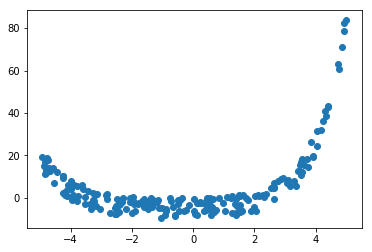

In [14]:
matplotlib.pyplot.scatter(xh, yh)

In [15]:
xh = xh.reshape(200, 1)
model = OLS(np.asarray(yh), xh)
p = model.predict()

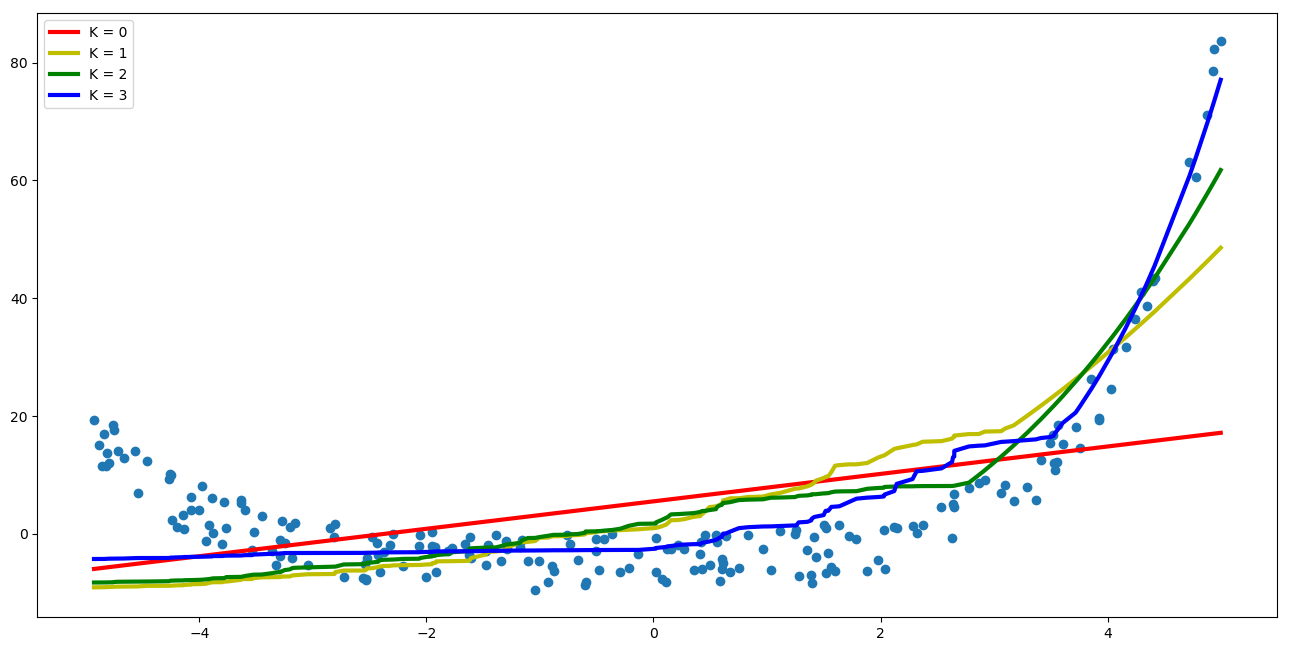

In [33]:
color_dict = {0:'r',1:'y',2:'g',3:'b'}
matplotlib.pyplot.figure(figsize=(16, 8), dpi=100)
matplotlib.pyplot.scatter(xh, yh)
for i in range(4):
    if (i == 0):
        temp_x = xh
    else:
        t = xh ** (i+1)
        temp_x = np.concatenate((temp_x, t), axis=1)
        # temp_x = np.vstack((t,(xh ** (i+1))))\n",
    # temp_x = temp_x.reshape(200,i+1)\n",
    y = np.asarray(yh)
    # y = y.reshape(200,)\n",
    # y = y.reshape(200,1)\n",
    model = OLS(y, temp_x)
    p = model.predict()
    p = p.reshape(200,1)
    tt = np.concatenate((xh, p), axis=1) # join х and predicted values (p)
    tt = np.sort(tt, axis = 0) # sort by x
    matplotlib.pyplot.plot(tt[:,0],tt[:,1], color = color_dict[i], linewidth = 3, label = 'K = ' + str(i))
    matplotlib.pyplot.legend()
    # matplotlib.pyplot.plot(xh,p, snap = False, color = color_dict[i], linewidth = 3)

# 3

In [20]:
nrows, ncols = 100, 100
matrix = np.random.normal(0, 1, size=(nrows, ncols)).astype('float64')

# 1A (for columns)
from scipy import stats
n = len(matrix)
col_means = np.mean(matrix, axis=0)
col_stds = np.std(matrix, axis=0)
col_ses = np.sqrt(col_stds / n)
t_cr = stats.t.isf(0.05, n-1)
col_width = col_ses * t_cr
col_ci_up = col_means + col_width
col_ci_low = col_means - col_width
col_zero = (col_ci_up > 0) & (col_ci_low < 0)
col_zero

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,  True], dtype=bool)

In [21]:
# 2A
sum(col_zero)

93

In [22]:
# 1B
nrows, ncols = 100, 100
matrix = np.random.normal(0, 1, size=(nrows, ncols)).astype('float64')

# 1A (for )
from scipy import stats
n = len(matrix)
row_means = np.mean(matrix, axis=1)
row_stds = np.std(matrix, axis=1)
row_ses = np.sqrt(row_stds / n)
t_cr = stats.t.isf(0.05, n-1)
row_width = row_ses * t_cr
row_ci_up = row_means + row_width
row_ci_low = row_means - row_width
row_zero = (row_ci_up > 0) & (row_ci_low < 0)
row_zero

array([ True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,  True], dtype=bool)

In [23]:
# 2B
sum(row_zero)

95

# 4

In [24]:
# 1
df = pd.read_csv('goalies-2014-2016.csv', skiprows = 0, sep = ';')
first_6_col = list(df.columns)[:6]
df.head()[first_6_col]

,n,player,season,team,position,games_played
0,1,Cam Talbot,2016-17,EDM,G,73
1,2,Braden Holtby,2016-17,WSH,G,63
2,3,Sergei Bobrovsky,2016-17,CBJ,G,63
3,4,Devan Dubnyk,2016-17,MIN,G,65
4,5,Tuukka Rask,2016-17,BOS,G,65


In [25]:
# 2
df['save_percentage_self'] = df['saves'] / df['shots_against']
df['error'] = df['save_percentage'] - df['save_percentage_self']
df['error'].max()

0.00049999999999994493

In [26]:
# 3
col_std = ['goals_against', 'games_played', 'save_percentage']
print(df[col_std].std())
print(df[col_std].mean())

goals_against      53.351779
games_played       22.285395
save_percentage     0.071260
dtype: float64
goals_against      67.605735
games_played       28.476703
save_percentage     0.901179
dtype: float64


In [27]:
# 4
df_4 = df[df['season'] == '2016-17'] 
df_4 = df_4[df_4['games_played'] > 40]
df_4[df_4['save_percentage'] == df_4['save_percentage'].max()][['player','save_percentage']]

,player,save_percentage
2,Sergei Bobrovsky,0.931


In [44]:
# 6
df_6 = df[df['wins'] > 29][['season', 'player', 'wins']]
df_6 = df_6.groupby("player").filter(lambda x: len(x) == 3)
df_6

,season,player,wins
1,2016-17,Braden Holtby,42
3,2016-17,Devan Dubnyk,40
4,2016-17,Tuukka Rask,37
10,2016-17,Corey Crawford,32
11,2016-17,Pekka Rinne,31
12,2016-17,Henrik Lundqvist,31
95,2015-16,Braden Holtby,48
101,2015-16,Corey Crawford,35
102,2015-16,Henrik Lundqvist,35
103,2015-16,Pekka Rinne,34


In [45]:
df_6.player.unique()

array(['Braden Holtby', 'Devan Dubnyk', 'Tuukka Rask', 'Corey Crawford',
       'Pekka Rinne', 'Henrik Lundqvist'], dtype=object)